In [ ]:
import mir_eval
import numpy as np
import os
import pandas as pd
import sys
sys.path.append('../src')
import localmodule


# Define constants.
data_dir = localmodule.get_data_dir()
dataset_name = localmodule.get_dataset_name()
models_dir = localmodule.get_models_dir()
units = localmodule.get_units()
n_units = len(units)
trials = [5, 7, 9, 7, 7, 8] # maximize clip-wise val acc
thresholds = 1.0 - np.logspace(-7, 0, 141)[::-1]
n_thresholds = len(thresholds)
tolerance = 0.5 # in seconds


# Define directory for model.
aug_str = "all"
model_name = "icassp-convnet"
if not aug_str == "none":
    model_name = "_".join([model_name, "aug-" + aug_str])
model_dir = os.path.join(models_dir, model_name)


# Define directory for annotations.
annotations_name = "_".join([dataset_name, "annotations"])
annotations_dir = os.path.join(data_dir, annotations_name)


tp_matrix = np.zeros((n_thresholds, n_units))
fp_matrix = np.zeros((n_thresholds, n_units))
fn_matrix = np.zeros((n_thresholds, n_units))

# Loop over recording units.
for test_unit_id in range(n_units):
    test_unit_str = units[test_unit_id]
    unit_dir = os.path.join(model_dir, test_unit_str)
    trial_id = trials[test_unit_id]
    trial_str = "trial-" + str(trial_id)
    trial_dir = os.path.join(unit_dir, trial_str)
    prediction_name = "_".join([
        dataset_name,
        model_name,
        "test-" + test_unit_str,
        trial_str,
        "predict-" + test_unit_str,
        "full-predictions.csv"])
    prediction_path = os.path.join(trial_dir, prediction_name)
    prediction_df = pd.read_csv(prediction_path)

    annotation_path = os.path.join(annotations_dir,
        test_unit_str + ".txt")
    annotation = pd.read_csv(annotation_path, '\t')
    begin_times = np.array(annotation["Begin Time (s)"])
    end_times = np.array(annotation["End Time (s)"])
    relevant = 0.5 * (begin_times + end_times)
    n_relevant = len(relevant)

    y_pred = np.array(prediction_df["Predicted probability"])
    timestamps = np.array(prediction_df["Timestamp"])


    for th_id, threshold in enumerate(thresholds):
        selected = timestamps[y_pred > threshold]

        selected_relevant = mir_eval.util.match_events(
            relevant, selected, tolerance)

        true_positives = len(selected_relevant)
        n_selected = len(selected)
        false_positives = n_selected - true_positives
        false_negatives = n_relevant - true_positives

        tp_matrix[th_id, test_unit_id] = true_positives
        fp_matrix[th_id, test_unit_id] = false_positives
        fn_matrix[th_id, test_unit_id] = false_negatives
        
global_precisions = 100 * global_tp / (global_tp+global_fp)
global_recalls = 100 * global_tp / (global_tp+global_fn)
global_f1_scores = 2*global_precisions*global_recalls /\
    (global_precisions+global_recalls)
    
plt.plot([0.0] + list(global_precisions) + [100.0], [100.0] + list(global_recalls) + [0.0], '-o')

In [99]:
from matplotlib import pyplot
%matplotlib inline
plt.plot([0.0] + precisions + [100.0], [100.0] + recalls + [0.0])

print(precisions[np.argmax(f1_scores)], recalls[np.argmax(f1_scores)], max(f1_scores))

52.09570066558734 61.09704641350211 56.23846975434508


In [114]:
global_tp = np.sum(tp_matrix, axis=1)
global_fp = np.sum(fp_matrix, axis=1)
global_fn = np.sum(fn_matrix, axis=1)

In [134]:
aug_global_precisions = global_precisions
aug_global_recalls = global_recalls
aug_global_f1_scores = global_f1_scores

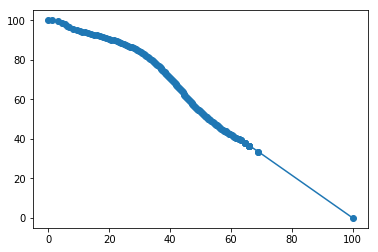

In [128]:
global_precisions

array([  1.1826962 ,   3.24586577,   4.46398739,   5.36983742,
         6.0940505 ,   6.75604233,   8.00298524,   9.47451893,
        10.32971568,  11.20291046,  12.10489918,  13.03324438,
        13.98239847,  14.94317742,  15.93688017,  16.92990166,
        17.89111628,  18.86823366,  19.80668283,  20.75548862,
        21.65816726,  22.49073009,  23.28801555,  24.0409992 ,
        24.78449647,  25.5323352 ,  26.23336676,  26.91293569,
        27.53081303,  28.13387743,  28.73305532,  29.28761178,
        29.82352941,  30.35368069,  30.84374283,  31.3259174 ,
        31.79604262,  32.25023011,  32.71324145,  33.14959177,
        33.56405857,  33.95029971,  34.34150263,  34.70690296,
        35.08265349,  35.4599102 ,  35.82223962,  36.21055986,
        36.55845734,  36.8776325 ,  37.15611027,  37.50318327,
        37.82758075,  38.18749909,  38.50341145,  38.81296427,
        39.12923839,  39.44949856,  39.71002629,  39.985296  ,
        40.30274515,  40.59508707,  40.92551092,  41.21